STability neurons

In [13]:
import numpy as np 
import pandas as pd
from tools import get_project_path


#tab_IP = pd.read_csv(get_project_path("results/benchmark/6x100-0.026/09_06_17h30_05s_SDP-IP/results.csv"))
#tab_IP = tab_IP[~tab_IP["data_index"].isin([56,96,99])]
tab = pd.read_csv(get_project_path("results/benchmark/6x200-0.015/09_07_17h22_02s_SDPu/results.csv"))


In [19]:

if "RLT_prop" in tab.columns:
    tab["RLT_prop"] = tab["RLT_prop"].fillna(0)
    RLT_prop = tab["RLT_prop"].unique()
    
    print("RLT_prop:", RLT_prop)
    #RLT_props = [0, 0.1, 0.3, 0.5]
    #tab = tab[tab["RLT_prop"].isin(RLT_props)].copy()

tab["total_time"] = tab["time"] + tab["bound_time"]
tab["robust"] = (tab["optimal_value"] >= 0) | (tab["status"]=="trivially_solved")
tab["target"] = tab["target"].fillna("unknown")

RLT_prop: [0.  0.1 0.2]


In [20]:
tab.groupby(["data_index", "target"]).count()

LAST_LAYER  MATRIX_BY_LAYERS  McC_betaz_logits  \
data_index target                                                    
0          unknown           1                 1                 0   
1          unknown           1                 1                 0   
2          unknown           1                 1                 0   
3          unknown           1                 1                 0   
4          unknown           1                 1                 0   
...                        ...               ...               ...   
95         unknown           2                 2                 2   
96         unknown           2                 2                 2   
97         unknown           2                 2                 2   
98         unknown           2                 2                 2   
99         unknown           1                 1                 0   

                    Nb_stable_actives  Nb_stable_inactives  RLT  RLT_prop  \
data_index target                                                           
0          unknown                  1                    1    0         1   
1          unknown                  1                    1    0         1   
2          unknown                  1                    1    0         1   
3          unknown                  1                    1    0         1   
4          unknown                  1                    1    0         1   
...                               ...                  ...  ...       ...   
95         unknown                  2                    2    2         2   
96         unknown                  2                    2    2         2   
97         unknown                  2                    2    2         2   
98         unknown                  2                    2    2         2   
99         unknown                  1                    1    0         1   

                    Tij  Tij_before_penultimate_layer  USE_STABLE_ACTIVES  \
data_index target                                                           
0          unknown    0                             0                   1   
1          unknown    0                             0                   1   
2          unknown    0                             0                   1   
3          unknown    0                             0                   1   
4          unknown    0                             0                   1   
...                 ...                           ...                 ...   
95         unknown    2                             2                   2   
96         unknown    2                             2                   2   
97         unknown    2                             2                   2   
98         unknown    2                             2                   2   
99         unknown    0                             0                   1   

                    ...  model  network  optimal_value  pretreatment_time  \
data_index target   ...                                                     
0          unknown  ...      1        1              0                  1   
1          unknown  ...      1        1              0                  1   
2          unknown  ...      1        1              0                  1   
3          unknown  ...      1        1              0                  1   
4          unknown  ...      1        1              0                  1   
...                 ...    ...      ...            ...                ...   
95         unknown  ...      2        2              2                  2   
96         unknown  ...      2        2              2                  2   
97         unknown  ...      2        2              2                  2   
98         unknown  ...      2        2              2                  2   
99         unknown  ...      1        1              0                  1   

                    primal_obj_value  status  time  triangularization  \
data_index target             

In [21]:

robust_mean_data_index = tab.groupby(["data_index", "target"])["robust"].any()
#(robust_mean_data_index == 1).sum()
rob = robust_mean_data_index.reset_index().groupby("data_index")["robust"].all()
rob

data_index
0      True
1      True
2      True
3      True
4      True
      ...  
95     True
96     True
97    False
98     True
99     True
Name: robust, Length: 100, dtype: bool

In [22]:
rob.sum(
)

91

In [35]:
tab[tab["status"]=="trivially_solved"].groupby("data_index")["total_time"].sum().max()

6.727071285247803

In [36]:
tab[tab["status"]!="trivially_solved"].groupby("data_index")["total_time"].sum().max()

2298.304834127426

In [37]:
time_data_index = tab[tab["status"]!="trivially_solved"]["total_time"].groupby(tab["data_index"]).sum()
time_data_index.mean()

1788.5611459480392

<Axes: >

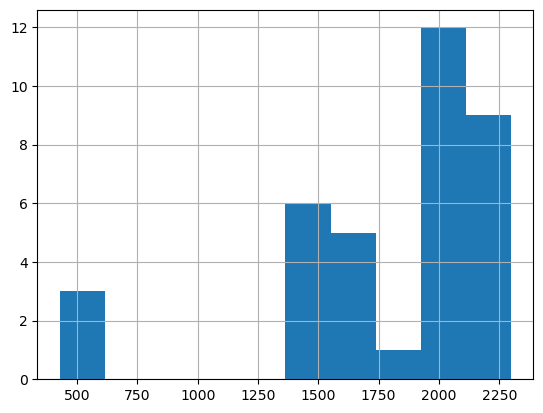

In [38]:
time_data_index.hist(bins=10)

In [21]:
tab[tab["Number_targets"]!=0]["Number_targets"].mean()

KeyError: 'Number_targets'

In [ ]:
tab[tab["label"]!=tab["label_predicted"]]["data_index"]

In [ ]:
tab["bound_time"].mean()

In [ ]:
tab[tab["status"]=="trivially_solved"]

## LP


tab = pd.read_csv(get_project_path("results/benchmark/6x100-0.026/09_06_17h30_05s_SDP-IP/results.csv"))